Домашнее задание:

Используя файл Lesson_3_extended.ipynb (он в web3.zip в материалах):

1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.
2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).
4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).
5. *Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.
6. Могла ли модель переобучиться? Почему?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

In [4]:
X_st = X.copy()
X_st[:, 2] = standard_scale(X[:, 2])

In [5]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [6]:
y1 = np.array([1,0])
y_pred1 = np.array([0.9,1])
calc_logloss(y1, y_pred1)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


inf

___________________________________

1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

______________________________________________________

In [7]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [8]:
z = np.linspace(-10, 10, 101)

In [9]:
probabilities = sigmoid(z)

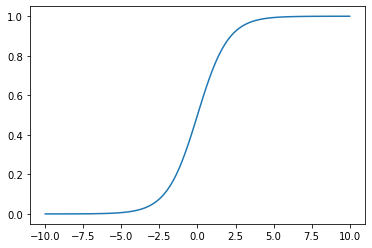

In [10]:
plt.plot(z, probabilities)
plt.show()

Logistic Regression

In [11]:
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [12]:
W = eval_model(X_st, y, iterations=500, eta=1e-4)

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
50 [ 0.494784   -0.14564801  0.6475462   1.52014828] 1.1657985749255426
100 [ 0.49290109 -0.15285535  0.64740132  1.51733474] 1.1531112685708473
150 [ 0.49102761 -0.16003088  0.64725118  1.51453281] 1.1405352753305018
200 [ 0.48916364 -0.16717404  0.64709581  1.51174267] 1.1280719326917483
250 [ 0.48730929 -0.17428428  0.64693524  1.50896452] 1.1157225565960736
300 [ 0.48546465 -0.18136107  0.64676951  1.50619853] 1.103488442622439
350 [ 0.48362982 -0.18840385  0.64659868  1.5034449 ] 1.0913708674192037
400 [ 0.48180488 -0.19541206  0.64642281  1.50070383] 1.0793710903721336
450 [ 0.47998993 -0.20238516  0.64624195  1.49797551] 1.0674903554915993


1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [33]:
#1 Вариант реализации: мы говорим, что если вероятность 100%, на самом деле вероятность не 100, а 100 - очень маленькое число,
# верно и обратное: если вероятность 0%, на самом деле вероятность 0 + очень маленькое число

def calc_logloss_updated(y, y_pred):
    y=list(y)
    y_pred=list(y_pred)
    y_pred_new=[]
    for element in y_pred:
        if element==0.0:
            element+=1e-6
        elif element==1.0:
            element-=1e-6
        else:
            element
        y_pred_new.append(element)
    err = - np.mean(np.array(y) * np.log(np.array(y_pred_new)) + (1.0 - np.array(y)) * np.log(1.0 - np.array(y_pred_new)))
    return err

In [13]:
#2 Вариант реализации: мы говорим, что если вероятность 100% или 0, мы расцениваем данные события, как выбросы, поскольку они очень маловероятны и исключаем их из выборки

def calc_logloss_updated2(y, y_pred):
    y=list(y)
    y_pred=list(y_pred)
    for element in y_pred:
        if element==0.0 or element==1.0:
            y.pop(y_pred.index(element))
            y_pred.remove(element)
    err = - np.mean(np.array(y) * np.log(np.array(y_pred)) + (1.0 - np.array(y)) * np.log(1.0 - np.array(y_pred)))
    return err

In [36]:
y1 = np.array([1,0])
y_pred1 = np.array([0.9,0])
calc_logloss_updated(y1, y_pred1)

0.052680757829163156

In [35]:
y1 = np.array([1,0])
y_pred1 = np.array([0.9,1])
calc_logloss_updated2(y1, y_pred1)

0.10536051565782628

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [15]:
def eval_model_updated(X, y,stop_iter=False):
    np.random.seed(42)
    W_initial= np.random.randn(X.shape[1])
    small_value=np.array([stop_iter]*X.shape[1])
    n = X.shape[0]
    
    dict_={}
    eta_list=[1e-3,1e-2,1e-1]
    for eta in eta_list:
        print(f'------eta:{eta}-----')
        W=W_initial.copy()
        print(W)
        weight_list=[]
        weight_list.append(np.array(W))
        i=0
        while True:
        #for i in range(iterations):
            z = np.dot(X, W)
            y_pred = sigmoid(z)
            err = calc_logloss_updated2(y, y_pred)
        
            dQ = 1/n * X.T @ (y_pred - y)
            W -= eta * dQ
            weight_list.append(np.array(W))
            
            if eta==1e-3:
                if i % 100 == 0:
                    print(f'итерация: {i}, веса: {W}, ошибка: {err}')
            elif eta==1e-2:
                if i % 1000 == 0:
                    print(f'итерация: {i}, веса: {W}, ошибка: {err}')
            else:
                if i % 10000 == 0:
                    print(f'итерация: {i}, веса: {W}, ошибка: {err}')
                
    
            if np.all(np.abs(weight_list[-1]-weight_list[-2])<=small_value):
                break
            else:
                i+=1
                continue
            
        dict_[eta]=weight_list
    return dict_

In [16]:
W = eval_model_updated(X_st, y,1e-4)

------eta:0.001-----
[ 0.49671415 -0.1382643   0.64768854  1.52302986]
итерация: 0, веса: [ 0.49633477 -0.13971518  0.64766116  1.52246371], ошибка: 1.1785958344356262
итерация: 100, веса: [ 0.46038628 -0.27784345  0.64391879  1.46838117], ошибка: 0.9449083796207038
итерация: 200, веса: [ 0.42880798 -0.398758    0.63895621  1.42057357], ошибка: 0.76478635339061
итерация: 300, веса: [ 0.40211124 -0.49592634  0.63495855  1.38143191], ошибка: 0.6465819250979652
итерация: 400, веса: [ 0.3802473  -0.56578851  0.63387547  1.35226238], ошибка: 0.5834626177311397
итерация: 500, веса: [ 0.36227303 -0.61296537  0.6357139   1.33157192], ошибка: 0.5531388819143023
итерация: 600, веса: [ 0.34705426 -0.6447563   0.63955258  1.31689489], ошибка: 0.5381879835818275
итерация: 700, веса: [ 0.33375348 -0.66658248  0.64461446  1.30632368], ошибка: 0.5301812678912075
итерация: 800, веса: [ 0.32182152 -0.6818318   0.65041019  1.29860717], ошибка: 0.5254538963664757
итерация: 900, веса: [ 0.31089651 -0.69260

3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [17]:
def calc_pred_proba(W,X):
    for k,v in W.items():
        print(f'---{k}---')
        for element in enumerate(v):
            y_prob=sigmoid(X_st@element[1])
            if element[0]%100==0:
                print(f'итерация: {element[0]}, предсказанная вероятность: {y_prob}')

In [19]:
calc_pred_proba(W,X_st)

---0.001---
итерация: 0, предсказанная вероятность: [0.77678197 0.81967624 0.95100063 0.69583154 0.97730047 0.85643521
 0.9937923  0.99364588 0.76498816 0.9644164 ]
итерация: 100, предсказанная вероятность: [0.73541263 0.78378631 0.92734664 0.51222573 0.96082379 0.84517022
 0.9849608  0.96962455 0.72229174 0.94678033]
итерация: 200, предсказанная вероятность: [0.69561336 0.74839277 0.89837588 0.34697965 0.93726961 0.8347255
 0.96757048 0.88758968 0.68148494 0.92475379]
итерация: 300, предсказанная вероятность: [0.66083343 0.7168553  0.86773455 0.23462076 0.90909653 0.82562892
 0.94046002 0.71890358 0.6460072  0.90100637]
итерация: 400, предсказанная вероятность: [0.63339398 0.69173654 0.84035944 0.17032421 0.88192108 0.81819824
 0.90872696 0.53139099 0.61808868 0.87950085]
итерация: 500, предсказанная вероятность: [0.61275137 0.67284607 0.81843772 0.13466409 0.85947    0.81226014
 0.87900346 0.39546589 0.59708742 0.86218295]
итерация: 600, предсказанная вероятность: [0.59706849 0.65859

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [20]:
def calc_pred(W,X=False):
    for k,v in W.items():
        print(f'---{k}---')
        for element in enumerate(v):
            pred_=[]
            y_prob=sigmoid(X@element[1])
            for i in y_prob:
                if i>0.5:
                    pred_.append(1)
                else:
                    pred_.append(0)
#            print(y_prob,pred_)
            if element[0]%100==0:
                print(f'итерация: {element[0]}, предсказанный класс: {pred_}')

In [21]:
calc_pred(W,X_st)

---0.001---
итерация: 0, предсказанный класс: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
итерация: 100, предсказанный класс: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
итерация: 200, предсказанный класс: [1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
итерация: 300, предсказанный класс: [1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
итерация: 400, предсказанный класс: [1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
итерация: 500, предсказанный класс: [1, 1, 1, 0, 1, 1, 1, 0, 1, 1]
итерация: 600, предсказанный класс: [1, 1, 1, 0, 1, 1, 1, 0, 1, 1]
итерация: 700, предсказанный класс: [1, 1, 1, 0, 1, 1, 1, 0, 1, 1]
итерация: 800, предсказанный класс: [1, 1, 1, 0, 1, 1, 1, 0, 1, 1]
итерация: 900, предсказанный класс: [1, 1, 1, 0, 1, 1, 1, 0, 1, 1]
---0.01---
итерация: 0, предсказанный класс: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
итерация: 100, предсказанный класс: [1, 1, 1, 0, 1, 1, 1, 0, 1, 1]
итерация: 200, предсказанный класс: [1, 1, 1, 0, 1, 1, 1, 0, 0, 1]
итерация: 300, предсказанный класс: [0, 1, 1, 0, 1, 1, 1, 0, 0, 1]
итерация: 400, предсказанный класс: [0, 1, 

5. *Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.

In [22]:
#Accuracy
def accuracy(W,X,y):
    for k,v in W.items():
        print(f'---{k}---')
        for element in enumerate(v):
            pred_=[]
            y_prob=sigmoid(X@element[1])
            for i in y_prob:
                if i>0.5:
                    pred_.append(1)
                else:
                    pred_.append(0)
            accuracy=np.mean(y==pred_)*100
            if element[0]%100==0:
                print(f'итерация: {element[0]}, точность: {accuracy}')

In [23]:
accuracy(W,X_st,y)

---0.001---
итерация: 0, точность: 50.0
итерация: 100, точность: 50.0
итерация: 200, точность: 60.0
итерация: 300, точность: 60.0
итерация: 400, точность: 60.0
итерация: 500, точность: 70.0
итерация: 600, точность: 70.0
итерация: 700, точность: 70.0
итерация: 800, точность: 70.0
итерация: 900, точность: 70.0
---0.01---
итерация: 0, точность: 50.0
итерация: 100, точность: 70.0
итерация: 200, точность: 60.0
итерация: 300, точность: 70.0
итерация: 400, точность: 70.0
итерация: 500, точность: 70.0
итерация: 600, точность: 70.0
итерация: 700, точность: 70.0
итерация: 800, точность: 70.0
итерация: 900, точность: 70.0
итерация: 1000, точность: 70.0
итерация: 1100, точность: 80.0
итерация: 1200, точность: 80.0
итерация: 1300, точность: 80.0
итерация: 1400, точность: 80.0
итерация: 1500, точность: 80.0
итерация: 1600, точность: 80.0
итерация: 1700, точность: 80.0
итерация: 1800, точность: 80.0
итерация: 1900, точность: 80.0
итерация: 2000, точность: 80.0
итерация: 2100, точность: 80.0
итерация:

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
#Матрица ошибок
def matrix_(W,X,y):
    for k,v in W.items():
        print(f'---{k}---')
        for element in enumerate(v):
            pred_=[]
            y_prob=sigmoid(X@element[1])
            for i in y_prob:
                if i>0.5:
                    pred_.append(1)
                else:
                    pred_.append(0)
            if element[0]%100==0:
                print(f'итерация: {element[0]}, матрица ошибок: {confusion_matrix(y,pred_)}')

In [26]:
matrix_(W,X_st,y)

---0.001---
итерация: 0, матрица ошибок: [[0 5]
 [0 5]]
итерация: 100, матрица ошибок: [[0 5]
 [0 5]]
итерация: 200, матрица ошибок: [[1 4]
 [0 5]]
итерация: 300, матрица ошибок: [[1 4]
 [0 5]]
итерация: 400, матрица ошибок: [[1 4]
 [0 5]]
итерация: 500, матрица ошибок: [[2 3]
 [0 5]]
итерация: 600, матрица ошибок: [[2 3]
 [0 5]]
итерация: 700, матрица ошибок: [[2 3]
 [0 5]]
итерация: 800, матрица ошибок: [[2 3]
 [0 5]]
итерация: 900, матрица ошибок: [[2 3]
 [0 5]]
---0.01---
итерация: 0, матрица ошибок: [[0 5]
 [0 5]]
итерация: 100, матрица ошибок: [[2 3]
 [0 5]]
итерация: 200, матрица ошибок: [[2 3]
 [1 4]]
итерация: 300, матрица ошибок: [[3 2]
 [1 4]]
итерация: 400, матрица ошибок: [[3 2]
 [1 4]]
итерация: 500, матрица ошибок: [[3 2]
 [1 4]]
итерация: 600, матрица ошибок: [[3 2]
 [1 4]]
итерация: 700, матрица ошибок: [[3 2]
 [1 4]]
итерация: 800, матрица ошибок: [[3 2]
 [1 4]]
итерация: 900, матрица ошибок: [[3 2]
 [1 4]]
итерация: 1000, матрица ошибок: [[3 2]
 [1 4]]
итерация: 1100

In [27]:
#Точность
def precision_(W,X,y):
    for k,v in W.items():
        print(f'---{k}---')
        for element in enumerate(v):
            tp=[]
            pred_=[]
            y_prob=sigmoid(X@element[1])
            for i in y_prob:
                if i>0.5:
                    pred_.append(1)
                else:
                    pred_.append(0)
            for val in pred_:
                if val==y[pred_.index(val)] and val==1:
                    tp.append(val)
            precision=np.sum(tp)/np.sum(pred_)*100
            if element[0]%100==0:
                print(f'итерация: {element[0]},точность: {precision}')

In [28]:
precision_(W,X_st,y)

---0.001---
итерация: 0,точность: 0.0
итерация: 100,точность: 0.0
итерация: 200,точность: 0.0
итерация: 300,точность: 0.0
итерация: 400,точность: 0.0
итерация: 500,точность: 0.0
итерация: 600,точность: 0.0
итерация: 700,точность: 0.0
итерация: 800,точность: 0.0
итерация: 900,точность: 0.0
---0.01---
итерация: 0,точность: 0.0
итерация: 100,точность: 0.0
итерация: 200,точность: 0.0
итерация: 300,точность: 0.0
итерация: 400,точность: 0.0
итерация: 500,точность: 0.0
итерация: 600,точность: 0.0
итерация: 700,точность: 0.0
итерация: 800,точность: 0.0
итерация: 900,точность: 0.0
итерация: 1000,точность: 0.0
итерация: 1100,точность: 100.0
итерация: 1200,точность: 100.0
итерация: 1300,точность: 100.0
итерация: 1400,точность: 100.0
итерация: 1500,точность: 100.0
итерация: 1600,точность: 100.0
итерация: 1700,точность: 100.0
итерация: 1800,точность: 100.0
итерация: 1900,точность: 100.0
итерация: 2000,точность: 100.0
итерация: 2100,точность: 100.0
итерация: 2200,точность: 100.0
итерация: 2300,точно

In [29]:
#Полнота
def recall_(W,X,y):
    for k,v in W.items():
        print(f'---{k}---')
        for element in enumerate(v):
            tp=[]
            fn=[]
            pred_=[]
            y_prob=sigmoid(X@element[1])
            for i in y_prob:
                if i>0.5:
                    pred_.append(1)
                else:
                    pred_.append(0)
            for val in pred_:
                if val==y[pred_.index(val)] and val==1:
                    tp.append(val)
                elif val!=y[pred_.index(val)] and val==0:
                    fn.append(val)
            recall=np.sum(tp)/np.sum(tp+fn)*100
            if element[0]%100==0:
                print(f'итерация: {element[0]}, полнота: {recall}')

In [30]:
recall_(W,X_st,y)

---0.001---
итерация: 0, полнота: nan
итерация: 100, полнота: nan
итерация: 200, полнота: nan
итерация: 300, полнота: nan
итерация: 400, полнота: nan
итерация: 500, полнота: nan
итерация: 600, полнота: nan
итерация: 700, полнота: nan
итерация: 800, полнота: nan
итерация: 900, полнота: nan
---0.01---
итерация: 0, полнота: nan
итерация: 100, полнота: nan
итерация: 200, полнота: nan
итерация: 300, полнота: nan
итерация: 400, полнота: nan


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


итерация: 500, полнота: nan
итерация: 600, полнота: nan
итерация: 700, полнота: nan
итерация: 800, полнота: nan
итерация: 900, полнота: nan
итерация: 1000, полнота: nan
итерация: 1100, полнота: 100.0
итерация: 1200, полнота: 100.0
итерация: 1300, полнота: 100.0
итерация: 1400, полнота: 100.0
итерация: 1500, полнота: 100.0
итерация: 1600, полнота: 100.0
итерация: 1700, полнота: 100.0
итерация: 1800, полнота: 100.0
итерация: 1900, полнота: 100.0
итерация: 2000, полнота: 100.0
итерация: 2100, полнота: 100.0
итерация: 2200, полнота: 100.0
итерация: 2300, полнота: 100.0
итерация: 2400, полнота: 100.0
итерация: 2500, полнота: 100.0
итерация: 2600, полнота: 100.0
итерация: 2700, полнота: 100.0
итерация: 2800, полнота: 100.0
итерация: 2900, полнота: 100.0
итерация: 3000, полнота: 100.0
итерация: 3100, полнота: 100.0
итерация: 3200, полнота: 100.0
итерация: 3300, полнота: 100.0
итерация: 3400, полнота: 100.0
итерация: 3500, полнота: 100.0
итерация: 3600, полнота: 100.0
итерация: 3700, полнота: 